## Importing Data

In [648]:
#Importing Data
import pandas as pd
df = pd.read_csv('dse_training_data.csv')
df.head()

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label
0,5.576035e+18,95,1,0.0,3,3,461,Southern Europe,Chrome,Windows,0
1,7.201047e+18,95,1,0.0,3,3,227,Eastern Asia,Opera,Windows,0
2,5.681465e+18,80,5,0.0,45,41,979,Western Europe,Chrome,Windows,0
3,5.387636e+17,95,1,0.0,5,5,52,Western Europe,Safari,Macintosh,0
4,6.901050e+18,95,2,0.0,7,7,144,Northern America,Safari,iOS,0


# Exploring data

**Observations:**
- The data has 144370 records. Only `subcontinent` and `device_operatingSystem` columns have some missing entries.

In [649]:
#Exploring columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144370 entries, 0 to 144369
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fullVisitorId           144370 non-null  float64
 1   days_inactive           144370 non-null  int64  
 2   num_visits              144370 non-null  int64  
 3   sum_transactionRevenue  144370 non-null  float64
 4   hits                    144370 non-null  int64  
 5   pageviews               144370 non-null  int64  
 6   timeOnSite              144370 non-null  int64  
 7   subcontinent            144205 non-null  object 
 8   device_browser          144370 non-null  object 
 9   device_operatingSystem  143712 non-null  object 
 10  converted_label         144370 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 12.1+ MB
None


In [650]:
df.converted_label.value_counts()

0    144146
1       224
Name: converted_label, dtype: int64

The above result shows a massive imbalance in the dataset. This needs to be addresses before making predictions. But first lets explore the different columns that this dataset has.

Let's make histograms to see if there is any column following gaussian distribution.

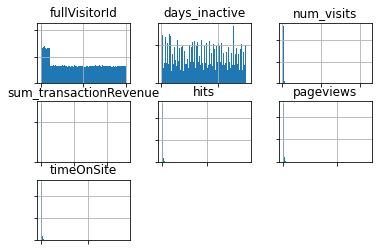

In [651]:
import matplotlib.pyplot as plt

# drop the target variable
temp_df= df.drop(columns=['converted_label'])

# create a histogram plot of each numeric variable
ax = temp_df.hist(bins=100)

# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])

# show the plot
plt.show()

# Exploring data by each column

### For `fullVisitorId` column:
- It can be converted to integer for better accessibility.

In [652]:
def to_int(record):
    try:
        return int(record)
    except:
        print(f'Cannot convert the record {record}')
        return record

df.fullVisitorId = df.fullVisitorId.apply(to_int)

In [653]:
l = len(df)
n = df.fullVisitorId.nunique()
print(f"Length of dataset is {l} and the total number of unique Visitor Ids are {n}.")
print(f"Percentage of unique visitor Ids as compared to full all visitors Ids is {(n/l)*100}")

Length of dataset is 144370 and the total number of unique Visitor Ids are 139984.
Percentage of unique visitor Ids as compared to full all visitors Ids is 96.96197270901156


- The above results shoes that there are as less as 3% users that have visited multiple times.
- This shows that majority (~97%) of users have only visited the site for once in the time range (Aug. 1 2016 and Aug. 1 2017.) that the dataset is collected.

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fullVisitorId', ylabel='Density'>

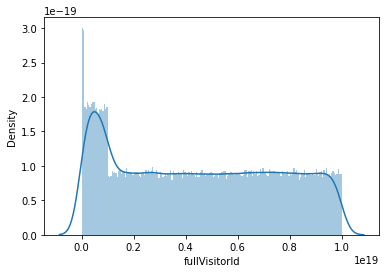

In [654]:
import seaborn as sns
sns.distplot(df.fullVisitorId, hist=True, kde=True, bins=200) 

- The density plot reveals a uniform distribution of the all the IDs. 
- Even those Ids that are present multiple times their only a very few are present 3 times or less.

In [655]:
# Exploring the IDs that are present multiple times.
temp_lst = df.fullVisitorId.value_counts()[:10].index.values.tolist()
temp_lst


[3694234028523169792,
 9127817804140120064,
 8321333727030930432,
 2252397032713459968,
 8157072901125839872,
 716776345712306944,
 5852480886445299712,
 9476348446859759616,
 7177372988985249792,
 7561014297963839488]

In [656]:
df[df['fullVisitorId'] == 3694234028523169792]

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label
2579,3694234028523169792,17,56,0.0,319,276,28393,Northern America,Chrome,Windows,0
3978,3694234028523169792,7,24,0.0,109,89,5604,Northern America,Chrome,Windows,0
7185,3694234028523169792,26,4,0.0,13,11,1107,Northern America,Chrome,Windows,0
31046,3694234028523169792,100,6,0.0,101,65,2499,Northern America,Chrome,Windows,0
75410,3694234028523169792,70,2,0.0,13,13,3219,Northern America,Chrome,Windows,0


In [657]:
df[df['fullVisitorId'] == 9127817804140120064]

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label
6990,9127817804140120064,118,6,0.0,9,9,20,Northern America,Chrome,Macintosh,0
24593,9127817804140120064,114,3,0.0,14,14,469,Northern America,Chrome,Macintosh,0
53638,9127817804140120064,65,12,0.0,18,17,1946,Northern America,Chrome,Macintosh,0
68141,9127817804140120064,118,1,0.0,3,3,53,Northern America,Chrome,Macintosh,0


In [658]:
df[df['fullVisitorId'] == 8321333727030930432]

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label
16637,8321333727030930432,36,2,0.0,3,3,32,Northern America,Chrome,Windows,0
56721,8321333727030930432,63,1,0.0,4,4,237,Northern America,Chrome,Windows,0
62550,8321333727030930432,50,1,0.0,7,6,135,Northern America,Chrome,Windows,0
103089,8321333727030930432,30,1,0.0,2,2,143,Northern America,Chrome,Windows,0


- Looking at the above records it seems that the records are fine and there is no major problem.

**However since our job is to predict the conversion of the customer, the Ids dont play a significant role in the the prediction problem. Hence the column can be disregarded for prediction.**

### For `days_inactive` column

In [659]:
df.days_inactive.tolist()[:15]

[95, 95, 80, 95, 95, 95, 95, 86, 95, 95, 95, 53, 95, 15, 85]

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_inactive', ylabel='Density'>

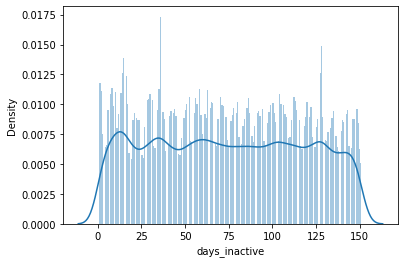

In [660]:
# Drawing the densiy plot to see the distribution
sns.distplot(df.days_inactive, hist=True, kde=True, bins=200) 


- The density plot reveals the uniform distribution of the `days_inactive` column data.
- It would be interesting to see if the distribution is the same for the records that were converted.

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


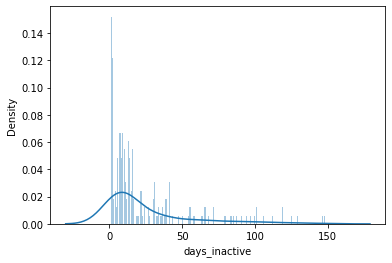

In [661]:
temp_df = df[df['converted_label'] == 1]
print(sns.distplot(temp_df.days_inactive, hist=True, kde=True, bins=200) )


**It should be noticed that there is a skewness in the above dennsity plot. This means that for the converted costomers have less days of inactivity in comparision to the non converted ones.**

Because of this, the `days_inactive` column can be considered as a contributing feature for the the customer conversion prediction problem.

In [662]:
def range_finder(series):
    for i in range(20):
        try:
            print(f"{i*5} to {(i+1)*5}% of data points lie in the range of {np.percentile(series, q = i*5)} to {np.percentile(series, q = (i+1)*5)}")
        except:
            print(f"Cant find range in {i*5} to {(i+1)*5}%")
range_finder(df.days_inactive)

0 to 5% of data points lie in the range of 1.0 to 8.0
5 to 10% of data points lie in the range of 8.0 to 14.0
10 to 15% of data points lie in the range of 14.0 to 21.0
15 to 20% of data points lie in the range of 21.0 to 29.0
20 to 25% of data points lie in the range of 29.0 to 36.0
25 to 30% of data points lie in the range of 36.0 to 44.0
30 to 35% of data points lie in the range of 44.0 to 52.0
35 to 40% of data points lie in the range of 52.0 to 59.0
40 to 45% of data points lie in the range of 59.0 to 66.0
45 to 50% of data points lie in the range of 66.0 to 73.0
50 to 55% of data points lie in the range of 73.0 to 81.0
55 to 60% of data points lie in the range of 81.0 to 89.0
60 to 65% of data points lie in the range of 89.0 to 97.0
65 to 70% of data points lie in the range of 97.0 to 104.0
70 to 75% of data points lie in the range of 104.0 to 112.0
75 to 80% of data points lie in the range of 112.0 to 120.0
80 to 85% of data points lie in the range of 120.0 to 127.0
85 to 90% of 

**Removing outliers**

- Since we have a high data imbalnce we will remover outliers from only the 0 label and as for the records with label as 1 we will limit their values.

In [663]:
temp_df_label_0 = df[df['converted_label'] == 0]
temp_df_label_1 = df[df['converted_label'] == 1]

In [664]:
import numpy as np

def get_stats(series):
    try:
        temp_mean = np.mean(series)
        temp_std = np.std(series)
        temp_threshold = temp_std*3
        temp_lower, temp_upper = temp_mean - temp_threshold , temp_mean + temp_threshold
        print(f"Stats:\nMean value = {temp_mean}\nStandard deviation = {temp_std}\nThreshold (Standard deviation *3) = {temp_threshold}\nLower range = {temp_lower}\nUpper range = {temp_upper}\nMax value = {max(series.tolist())}")
        return temp_mean, temp_std, temp_threshold, temp_lower, temp_upper
    except:
        print("Cannot Get the stats")
        return None, None, None, None, None


temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_0.days_inactive)

Stats:
Mean value = 74.28995601681628
Standard deviation = 43.44778023000328
Threshold (Standard deviation *3) = 130.34334069000985
Lower range = -56.05338467319358
Upper range = 204.63329670682612
Max value = 151


Since lower range has a negative value we would only use the upper range for filter.

In [665]:
max(temp_df_label_0.days_inactive.tolist())

151

Since the max value in the column is less than the upper limit for outliers there are not outliers beyoind stanndard deviation *3.

In [666]:
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_1.days_inactive)

Stats:
Mean value = 24.776785714285715
Standard deviation = 30.55329355096148
Threshold (Standard deviation *3) = 91.65988065288444
Lower range = -66.88309493859873
Upper range = 116.43666636717015
Max value = 148


In [667]:
max(temp_df_label_0.days_inactive.tolist())

151

In [668]:
#Limiting outliers for label 1
df.loc[temp_df_label_1[temp_df_label_1.days_inactive > temp_upper].index, 'days_inactive'] = temp_upper

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


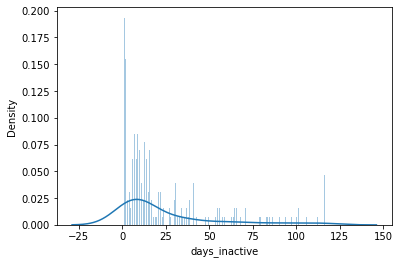

In [669]:
print(sns.distplot(df[df['converted_label'] == 1].days_inactive, hist=True, kde=True, bins=200) )

### For `num_visits` column

In [670]:
df.num_visits.value_counts()[:15]

1     111294
2      21792
3       5851
4       2380
5       1157
6        582
7        363
8        240
9        171
10       127
11        85
12        70
13        48
14        31
15        19
Name: num_visits, dtype: int64

In [671]:
temp_df_label_1.num_visits.value_counts()[:15]

1     116
2      40
3      16
4      13
6       8
8       8
5       6
7       4
15      3
14      1
46      1
34      1
27      1
10      1
13      1
Name: num_visits, dtype: int64

- The above observations reveal that the data has a high skewness. A skewness can be removed with power transformations. 
- Spacy module in python provides a boxcox method that performs the transformation in a way that the data becomes gaussian or uniform distribution.

Finding outliers

In [672]:
#Finidng and removing outliers for num_visits for label 0
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_0.num_visits)

Stats:
Mean value = 1.424396098400233
Standard deviation = 1.4420879550646464
Threshold (Standard deviation *3) = 4.326263865193939
Lower range = -2.9018677667937056
Upper range = 5.750659963594172
Max value = 110


Since max value is more than upper range we can remove outliers. 

In [673]:
df.drop(index = temp_df_label_0[temp_df_label_0.num_visits > temp_upper].index, inplace=True)

In [674]:
df.reset_index(inplace=True, drop = True)

In [675]:
print(f"Length of dataset after dropping is {len(df)}")

Length of dataset after dropping is 142507


In [676]:
def get_label_seperated_dfs(df):
    return df[df['converted_label'] == 0], df[df['converted_label'] == 1]
temp_df_label_0, temp_df_label_1 = get_label_seperated_dfs(df)

In [677]:
#finding outliers for label 1
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_1.num_visits)

Stats:
Mean value = 3.3660714285714284
Standard deviation = 6.412871453616721
Threshold (Standard deviation *3) = 19.238614360850164
Lower range = -15.872542932278735
Upper range = 22.60468578942159
Max value = 67


In [678]:
#limiting the values for outliers

df.loc[temp_df_label_1[temp_df_label_1.num_visits > temp_upper].index, 'num_visits'] = temp_upper

The best value of the factor that boxcox determined for removing the skewness is -4.854717355295847.


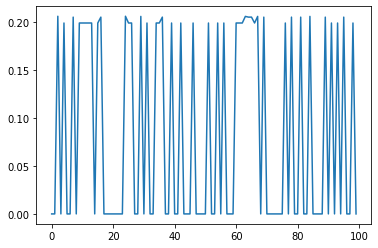

In [679]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

bx, lam = boxcox(df['num_visits'])
print(f'The best value of the factor that boxcox determined for removing the skewness is {lam}.')
plt.plot(bx[:100])


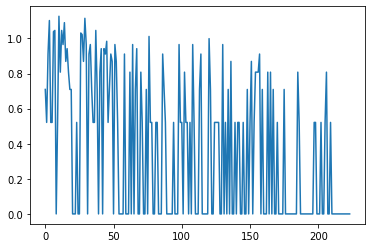

In [680]:
temp_bx, temp_lm = boxcox(temp_df['num_visits'])
plt.plot(temp_bx)

- Note that since the transformed distribution is uniform, it may become useless for model prediction. We will store this as a seperate column in our dataset and see later if there is really any contribution of this transformed column in prediction or not.

In [681]:
df['num_visits_transformed'] = bx
df.head()

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label,num_visits_transformed
0,5576035078968099840,95.0,1.0,0.0,3,3,461,Southern Europe,Chrome,Windows,0,0.000000
1,7201046511999320064,95.0,1.0,0.0,3,3,227,Eastern Asia,Opera,Windows,0,0.000000
2,5681465454867810304,80.0,5.0,0.0,45,41,979,Western Europe,Chrome,Windows,0,0.205902
3,538763607569025984,95.0,1.0,0.0,5,5,52,Western Europe,Safari,Macintosh,0,0.000000
4,6901049768533789696,95.0,2.0,0.0,7,7,144,Northern America,Safari,iOS,0,0.198866


### For `sum_transactionRevenue` column

In [682]:
df.sum_transactionRevenue[:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: sum_transactionRevenue, dtype: float64

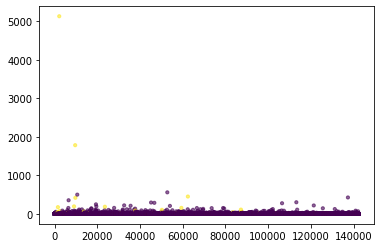

In [683]:
plt.scatter(x = df.index.values.tolist(), y = df.sum_transactionRevenue, c=df.converted_label, alpha = 0.6, s=10)

<AxesSubplot:>

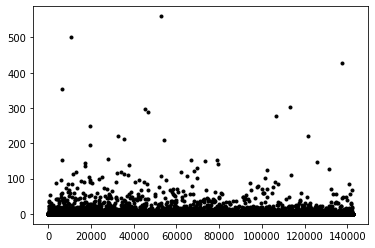

In [684]:
temp_df_label_0.sum_transactionRevenue.plot(style = '.k')

<AxesSubplot:>

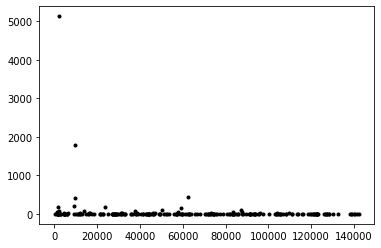

In [685]:
temp_df_label_1.sum_transactionRevenue.plot(style = '.k')

In [686]:
non_zero_transactions_percentage_for_label_1 = (len(temp_df_label_1[temp_df_label_1.sum_transactionRevenue != 0])/len(temp_df_label_1)) *100
print("non-zero sum transactions percentage for label 1 is", non_zero_transactions_percentage_for_label_1)

non_zero_transactions_percentage_for_label_0 = (len(temp_df_label_0[temp_df_label_0.sum_transactionRevenue != 0])/len(temp_df_label_0)) *100
print("non-zero sum transactions percentage for label 0 is", non_zero_transactions_percentage_for_label_0)

non-zero sum transactions percentage for label 1 is 28.57142857142857
non-zero sum transactions percentage for label 0 is 2.393820765657176


In [687]:
df.sum_transactionRevenue.describe()

count    142507.000000
mean          0.332703
std          15.192785
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5135.181000
Name: sum_transactionRevenue, dtype: float64

In [688]:
temp_df_label_1.sum_transactionRevenue.describe()

count     224.000000
mean       42.796812
std       365.032346
min         0.000000
25%         0.000000
50%         0.000000
75%         2.106250
max      5135.181000
Name: sum_transactionRevenue, dtype: float64

In [689]:
temp_df_label_0.sum_transactionRevenue.describe()

count    142283.000000
mean          0.265851
std           4.415757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         560.140000
Name: sum_transactionRevenue, dtype: float64

In [690]:
range_finder(df.sum_transactionRevenue)

0 to 5% of data points lie in the range of 0.0 to 0.0
5 to 10% of data points lie in the range of 0.0 to 0.0
10 to 15% of data points lie in the range of 0.0 to 0.0
15 to 20% of data points lie in the range of 0.0 to 0.0
20 to 25% of data points lie in the range of 0.0 to 0.0
25 to 30% of data points lie in the range of 0.0 to 0.0
30 to 35% of data points lie in the range of 0.0 to 0.0
35 to 40% of data points lie in the range of 0.0 to 0.0
40 to 45% of data points lie in the range of 0.0 to 0.0
45 to 50% of data points lie in the range of 0.0 to 0.0
50 to 55% of data points lie in the range of 0.0 to 0.0
55 to 60% of data points lie in the range of 0.0 to 0.0
60 to 65% of data points lie in the range of 0.0 to 0.0
65 to 70% of data points lie in the range of 0.0 to 0.0
70 to 75% of data points lie in the range of 0.0 to 0.0
75 to 80% of data points lie in the range of 0.0 to 0.0
80 to 85% of data points lie in the range of 0.0 to 0.0
85 to 90% of data points lie in the range of 0.0 to

In [691]:
range_finder(temp_df_label_1.sum_transactionRevenue)

0 to 5% of data points lie in the range of 0.0 to 0.0
5 to 10% of data points lie in the range of 0.0 to 0.0
10 to 15% of data points lie in the range of 0.0 to 0.0
15 to 20% of data points lie in the range of 0.0 to 0.0
20 to 25% of data points lie in the range of 0.0 to 0.0
25 to 30% of data points lie in the range of 0.0 to 0.0
30 to 35% of data points lie in the range of 0.0 to 0.0
35 to 40% of data points lie in the range of 0.0 to 0.0
40 to 45% of data points lie in the range of 0.0 to 0.0
45 to 50% of data points lie in the range of 0.0 to 0.0
50 to 55% of data points lie in the range of 0.0 to 0.0
55 to 60% of data points lie in the range of 0.0 to 0.0
60 to 65% of data points lie in the range of 0.0 to 0.0
65 to 70% of data points lie in the range of 0.0 to 0.0
70 to 75% of data points lie in the range of 0.0 to 2.10625
75 to 80% of data points lie in the range of 2.10625 to 4.940800000000002
80 to 85% of data points lie in the range of 4.940800000000002 to 10.434
85 to 90% of

In [692]:
import numpy as np

print("95% of the values in the sum transaction revenue for label 1 is covered in the range of 0 to", np.percentile(temp_df_label_1.sum_transactionRevenue, q = 95))

print("95% of the values in the sum transaction revenue for label 0 is covered in the range of 0 to", np.percentile(temp_df_label_0.sum_transactionRevenue, q = 95))


95% of the values in the sum transaction revenue for label 1 is covered in the range of 0 to 73.12429999999992
95% of the values in the sum transaction revenue for label 0 is covered in the range of 0 to 0.0


- There are few observations from the above results.
    
    1. The first scatter plot reveals the that there are few outliers in the dataset that have a very high sum for transaction revenue. 
    2. On seperating the graph for both positive and neative labels, it can be observed that some of there outliers have the positive label.
    3. On finding the percentage for non zero entries in each label category it can be see that positive labels have a much higher percentage. Hence more contribution for the final prediction.
    4. Positive labels have a higher mean for the sum transaction revenue (considering the outliers).
    5. Positive labels have a higher standard deviation for in comparision to the negative labels.
    6. 95% of the values for positive labels are within the range of 0 to 73.124. Hence we would not be loosing much data if we remove outliers by limiting any value greater than 100, in sum_transactionrevenue columm, to 100.

In [693]:
#Removing outliers for label 0
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_0.sum_transactionRevenue)

Stats:
Mean value = 0.2658506146201584
Standard deviation = 4.415741952139982
Threshold (Standard deviation *3) = 13.247225856419945
Lower range = -12.981375241799787
Upper range = 13.513076471040103
Max value = 560.14


In [694]:

df.drop(index = temp_df_label_0[temp_df_label_0.sum_transactionRevenue > temp_upper].index, inplace=True)
df.reset_index(inplace=True, drop = True)
temp_df_label_0, temp_df_label_1 = get_label_seperated_dfs(df)

In [695]:
#limiting outliers for label 1
df['sum_transactionRevenue'] = df.sum_transactionRevenue.apply(lambda x: x if x <=100 else 100)

print("Records transformed for label 0:", len(temp_df_label_0[temp_df_label_0.sum_transactionRevenue > 100]))
print("Records transformed for label 1:", len(temp_df_label_1[temp_df_label_1.sum_transactionRevenue > 100]))

df.head()

Records transformed for label 0: 0
Records transformed for label 1: 10


,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label,num_visits_transformed
0,5576035078968099840,95.0,1.0,0.0,3,3,461,Southern Europe,Chrome,Windows,0,0.000000
1,7201046511999320064,95.0,1.0,0.0,3,3,227,Eastern Asia,Opera,Windows,0,0.000000
2,5681465454867810304,80.0,5.0,0.0,45,41,979,Western Europe,Chrome,Windows,0,0.205902
3,538763607569025984,95.0,1.0,0.0,5,5,52,Western Europe,Safari,Macintosh,0,0.000000
4,6901049768533789696,95.0,2.0,0.0,7,7,144,Northern America,Safari,iOS,0,0.198866


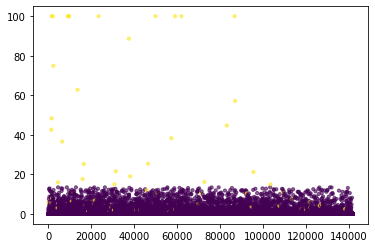

In [696]:
plt.scatter(x = df.index.values.tolist(), y = df.sum_transactionRevenue, c=df.converted_label, alpha = 0.6, s=10)

### For `hits` column

In [697]:
df.hits.tolist()[:20]

[3, 3, 45, 5, 7, 7, 8, 16, 11, 12, 13, 7, 14, 3, 2, 3, 4, 2, 2, 2]

In [698]:
df.hits.value_counts()[:15]

2     39220
3     22636
4     13894
5     10219
6      7691
7      6307
8      4935
9      4149
10     3441
11     2958
12     2496
13     2130
14     1950
15     1673
16     1503
Name: hits, dtype: int64

In [699]:
df.hits.describe()

count    141902.000000
mean          8.304189
std          14.017347
min           2.000000
25%           2.000000
50%           4.000000
75%           9.000000
max        1887.000000
Name: hits, dtype: float64

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hits', ylabel='Density'>

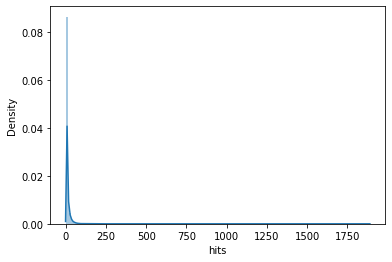

In [700]:
sns.distplot(df.hits, hist=True, kde=True, bins=200)

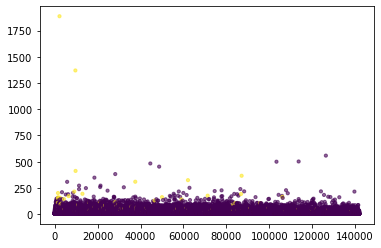

In [701]:
plt.scatter(x = df.index.values.tolist(), y = df.hits, c=df.converted_label, alpha = 0.6, s=10)

<AxesSubplot:>

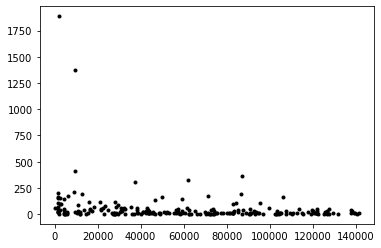

In [702]:
temp_df_label_1.hits.plot(style = '.k')

<AxesSubplot:>

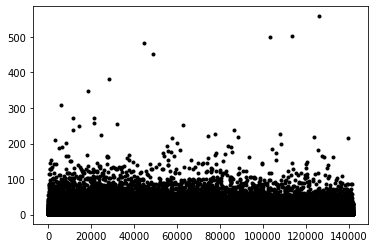

In [703]:
temp_df_label_0.hits.plot(style = '.k')

In [704]:
temp_df_label_1.hits.describe(), temp_df_label_0.hits.describe()

(count     224.000000
 mean       53.125000
 std       163.574978
 min         2.000000
 25%         6.000000
 50%        15.000000
 75%        44.000000
 max      1887.000000
 Name: hits, dtype: float64,
 count    141678.000000
 mean          8.233325
 std          12.308542
 min           2.000000
 25%           2.000000
 50%           4.000000
 75%           9.000000
 max         558.000000
 Name: hits, dtype: float64)

In [705]:
range_finder(df.hits)

0 to 5% of data points lie in the range of 2.0 to 2.0
5 to 10% of data points lie in the range of 2.0 to 2.0
10 to 15% of data points lie in the range of 2.0 to 2.0
15 to 20% of data points lie in the range of 2.0 to 2.0
20 to 25% of data points lie in the range of 2.0 to 2.0
25 to 30% of data points lie in the range of 2.0 to 3.0
30 to 35% of data points lie in the range of 3.0 to 3.0
35 to 40% of data points lie in the range of 3.0 to 3.0
40 to 45% of data points lie in the range of 3.0 to 4.0
45 to 50% of data points lie in the range of 4.0 to 4.0
50 to 55% of data points lie in the range of 4.0 to 5.0
55 to 60% of data points lie in the range of 5.0 to 5.0
60 to 65% of data points lie in the range of 5.0 to 6.0
65 to 70% of data points lie in the range of 6.0 to 7.0
70 to 75% of data points lie in the range of 7.0 to 9.0
75 to 80% of data points lie in the range of 9.0 to 11.0
80 to 85% of data points lie in the range of 11.0 to 14.0
85 to 90% of data points lie in the range of 14.

In [706]:
range_finder(temp_df_label_1.hits)

0 to 5% of data points lie in the range of 2.0 to 2.0
5 to 10% of data points lie in the range of 2.0 to 3.0
10 to 15% of data points lie in the range of 3.0 to 4.0
15 to 20% of data points lie in the range of 4.0 to 5.0
20 to 25% of data points lie in the range of 5.0 to 6.0
25 to 30% of data points lie in the range of 6.0 to 8.0
30 to 35% of data points lie in the range of 8.0 to 11.0
35 to 40% of data points lie in the range of 11.0 to 12.0
40 to 45% of data points lie in the range of 12.0 to 13.0
45 to 50% of data points lie in the range of 13.0 to 15.0
50 to 55% of data points lie in the range of 15.0 to 18.0
55 to 60% of data points lie in the range of 18.0 to 24.799999999999983
60 to 65% of data points lie in the range of 24.799999999999983 to 30.0
65 to 70% of data points lie in the range of 30.0 to 36.0
70 to 75% of data points lie in the range of 36.0 to 44.0
75 to 80% of data points lie in the range of 44.0 to 52.0
80 to 85% of data points lie in the range of 52.0 to 71.5499

In [707]:
#Removing outliers for label 0
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_0.hits)

Stats:
Mean value = 8.233324863422691
Standard deviation = 12.308498352476722
Threshold (Standard deviation *3) = 36.92549505743017
Lower range = -28.692170194007478
Upper range = 45.158819920852864
Max value = 558


In [708]:
df.drop(index = temp_df_label_0[temp_df_label_0.hits > temp_upper].index, inplace=True)
df.reset_index(inplace=True, drop = True)
temp_df_label_0, temp_df_label_1 = get_label_seperated_dfs(df)

In [709]:
print("96% of the values in the hits for label 1 is covered in the range of 0 to", np.percentile(temp_df_label_1.hits, q = 96))
print("96% of the values in the hits for label 0 is covered in the range of 0 to", np.percentile(temp_df_label_0.hits, q = 96))


96% of the values in the hits for label 1 is covered in the range of 0 to 192.15999999999997
96% of the values in the hits for label 0 is covered in the range of 0 to 26.0


- There are few observations from the above results.
    
    1. The first density and scatter plot reveals the that there are few outliers in the dataset that have a very high hits. 
    2. Positive labels have a higher mean for the hits (considering the outliers).
    3. Positive labels have a higher standard deviation in comparision to the negative labels.
    4. 96% of the values for positive labels are within the range of 0 to 192.16. Hence we would not be losing much data if we remove outliers by limiting any value greater than 200, in hits columm, to 200.

In [710]:
#limiting the values for outliers
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_1.hits)
df.loc[temp_df_label_1[temp_df_label_1.hits > temp_upper].index, 'hits'] = temp_upper

Stats:
Mean value = 53.125
Standard deviation = 163.20944721649627
Threshold (Standard deviation *3) = 489.6283416494888
Lower range = -436.5033416494888
Upper range = 542.7533416494888
Max value = 1887


In [711]:
len(df)

139255

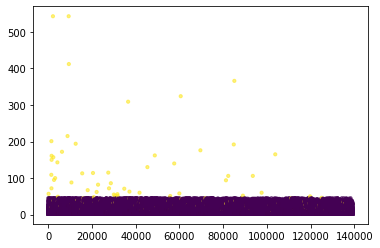

In [712]:
plt.scatter(x = df.index.values.tolist(), y = df.hits, c=df.converted_label, alpha = 0.6, s=10)

### For `pageviews` column

In [713]:
df.pageviews.tolist()[:20]

[3, 3, 41, 5, 7, 5, 7, 16, 11, 11, 10, 7, 14, 3, 2, 3, 4, 2, 2, 2]

In [714]:
df.pageviews.value_counts()[:20]

2     40145
3     23314
4     14878
5     10892
6      8050
7      6348
8      5030
9      4175
10     3295
11     2808
12     2377
13     2038
14     1770
15     1478
1      1380
16     1358
17     1215
18      977
19      941
20      764
Name: pageviews, dtype: int64

In [715]:
df.pageviews.describe()

count    139255.000000
mean          6.182399
std           8.140982
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max        1572.000000
Name: pageviews, dtype: float64

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pageviews', ylabel='Density'>

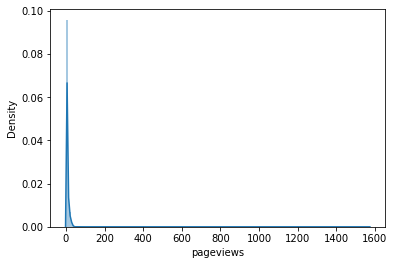

In [716]:
sns.distplot(df.pageviews, hist=True, kde=True, bins=200)

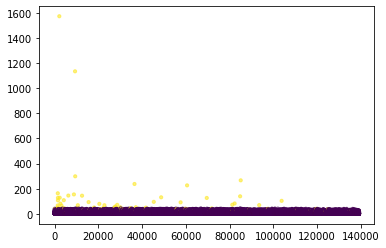

In [717]:
plt.scatter(x = df.index.values.tolist(), y = df.pageviews, c=df.converted_label, alpha = 0.6, s=10)

<AxesSubplot:>

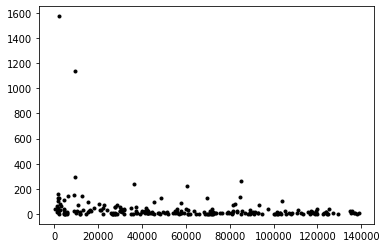

In [718]:
temp_df_label_1.pageviews.plot(style = '.k')

<AxesSubplot:>

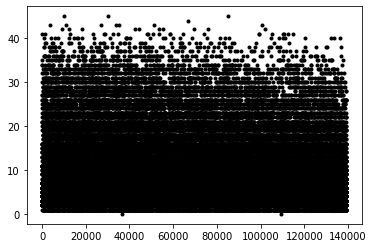

In [719]:
temp_df_label_0.pageviews.plot(style = '.k')

In [720]:
temp_df_label_1.pageviews.describe(), temp_df_label_0.pageviews.describe()

(count     224.000000
 mean       41.683036
 std       134.153759
 min         2.000000
 25%         5.000000
 50%        13.000000
 75%        33.000000
 max      1572.000000
 Name: pageviews, dtype: float64,
 count    139031.000000
 mean          6.125202
 std           5.956638
 min           0.000000
 25%           2.000000
 50%           4.000000
 75%           7.000000
 max          45.000000
 Name: pageviews, dtype: float64)

In [721]:
range_finder(df.pageviews)

0 to 5% of data points lie in the range of 0.0 to 2.0
5 to 10% of data points lie in the range of 2.0 to 2.0
10 to 15% of data points lie in the range of 2.0 to 2.0
15 to 20% of data points lie in the range of 2.0 to 2.0
20 to 25% of data points lie in the range of 2.0 to 2.0
25 to 30% of data points lie in the range of 2.0 to 3.0
30 to 35% of data points lie in the range of 3.0 to 3.0
35 to 40% of data points lie in the range of 3.0 to 3.0
40 to 45% of data points lie in the range of 3.0 to 3.0
45 to 50% of data points lie in the range of 3.0 to 4.0
50 to 55% of data points lie in the range of 4.0 to 4.0
55 to 60% of data points lie in the range of 4.0 to 5.0
60 to 65% of data points lie in the range of 5.0 to 5.0
65 to 70% of data points lie in the range of 5.0 to 6.0
70 to 75% of data points lie in the range of 6.0 to 7.0
75 to 80% of data points lie in the range of 7.0 to 9.0
80 to 85% of data points lie in the range of 9.0 to 11.0
85 to 90% of data points lie in the range of 11.0 

In [722]:
range_finder(temp_df_label_1.pageviews)

0 to 5% of data points lie in the range of 2.0 to 2.0
5 to 10% of data points lie in the range of 2.0 to 3.0
10 to 15% of data points lie in the range of 3.0 to 3.4499999999999957
15 to 20% of data points lie in the range of 3.4499999999999957 to 4.0
20 to 25% of data points lie in the range of 4.0 to 5.0
25 to 30% of data points lie in the range of 5.0 to 7.0
30 to 35% of data points lie in the range of 7.0 to 9.0
35 to 40% of data points lie in the range of 9.0 to 10.0
40 to 45% of data points lie in the range of 10.0 to 11.0
45 to 50% of data points lie in the range of 11.0 to 13.0
50 to 55% of data points lie in the range of 13.0 to 15.650000000000006
55 to 60% of data points lie in the range of 15.650000000000006 to 20.0
60 to 65% of data points lie in the range of 20.0 to 24.0
65 to 70% of data points lie in the range of 24.0 to 27.099999999999994
70 to 75% of data points lie in the range of 27.099999999999994 to 33.0
75 to 80% of data points lie in the range of 33.0 to 40.400000

In [723]:
#Removing outliers for label 0
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_0.pageviews)

Stats:
Mean value = 6.125202293013788
Standard deviation = 5.9566163467673885
Threshold (Standard deviation *3) = 17.869849040302164
Lower range = -11.744646747288375
Upper range = 23.995051333315953
Max value = 45


In [724]:
df.drop(index = temp_df_label_0[temp_df_label_0.pageviews > temp_upper].index, inplace=True)
df.reset_index(inplace=True, drop = True)
temp_df_label_0, temp_df_label_1 = get_label_seperated_dfs(df)

In [725]:
print("96% of the values in the pageviews for label 1 is covered in the range of 0 to", np.percentile(temp_df_label_1.pageviews, q = 96))
print("96% of the values in the pageviews for label 0 is covered in the range of 0 to", np.percentile(temp_df_label_0.pageviews, q = 96))

96% of the values in the pageviews for label 1 is covered in the range of 0 to 145.07999999999998
96% of the values in the pageviews for label 0 is covered in the range of 0 to 17.0


- There are few observations from the above results.
    
    1. The first density and scatter plot reveals the that there are few outliers in the dataset that have a very high pageviews. 
    2. Positive labels have a higher mean for the pageviews (considering the outliers).
    3. Positive labels have a higher standard deviation in comparision to the negative labels.


In [726]:
#Limiting outliers for label 1
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_1.pageviews)

Stats:
Mean value = 41.683035714285715
Standard deviation = 133.8539731976023
Threshold (Standard deviation *3) = 401.56191959280693
Lower range = -359.8788838785212
Upper range = 443.24495530709265
Max value = 1572


In [727]:
df['pageviews'] = df.pageviews.apply(lambda x: x if x <=temp_upper else temp_upper)
print("Records transformed for label 0:", len(temp_df_label_0[temp_df_label_0.pageviews > temp_upper]))
print("Records transformed for label 1:", len(temp_df_label_1[temp_df_label_1.pageviews > temp_upper]))

df.head()

Records transformed for label 0: 0
Records transformed for label 1: 2


,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label,num_visits_transformed
0,5576035078968099840,95.0,1.0,0.0,3.0,3.0,461,Southern Europe,Chrome,Windows,0,0.000000
1,7201046511999320064,95.0,1.0,0.0,3.0,3.0,227,Eastern Asia,Opera,Windows,0,0.000000
2,538763607569025984,95.0,1.0,0.0,5.0,5.0,52,Western Europe,Safari,Macintosh,0,0.000000
3,6901049768533789696,95.0,2.0,0.0,7.0,7.0,144,Northern America,Safari,iOS,0,0.198866
4,8777024166359079936,95.0,1.0,0.0,7.0,5.0,86,Northern Europe,Safari,iOS,0,0.000000


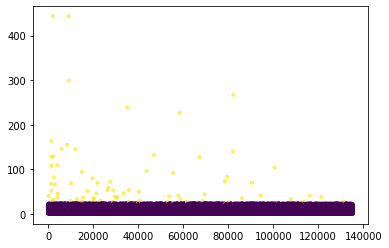

In [728]:
plt.scatter(x = df.index.values.tolist(), y = df.pageviews, c=df.converted_label, alpha = 0.6, s=10)

### For `timeOnSite` column

In [729]:
df.timeOnSite.tolist()[:15]

[461, 227, 52, 144, 86, 136, 3930, 229, 212, 453, 1079, 2371, 58, 119, 49]

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='timeOnSite', ylabel='Density'>

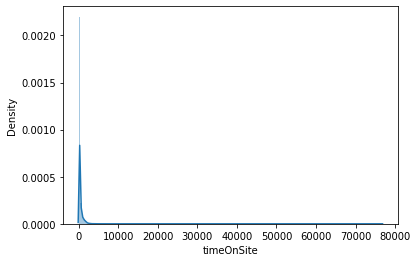

In [730]:
sns.distplot(df.timeOnSite, hist=True, kde=True, bins=200)

- On evaluation it can be seen that a high number of records have a value of zero as the amount of time they spent.

In [731]:
print("Total number of customers that did not spent any time on the site is ", df.timeOnSite.tolist().count(0))
print("Total number of customers with label 1 that did not spent any time on the site is ", temp_df_label_1.timeOnSite.tolist().count(0))
print("Total number of customers with label 0 that did not spent any time on the site is ", temp_df_label_0.timeOnSite.tolist().count(0))

Total number of customers that did not spent any time on the site is  7540
Total number of customers with label 1 that did not spent any time on the site is  3
Total number of customers with label 0 that did not spent any time on the site is  7537


In [732]:
print("Total number of customers with label 1 that did not spent any time on the site is ", temp_df_label_1.timeOnSite.tolist().count(1))

Total number of customers with label 1 that did not spent any time on the site is  0


In [733]:
range_finder(temp_df_label_1.timeOnSite)

0 to 5% of data points lie in the range of 0.0 to 12.15
5 to 10% of data points lie in the range of 12.15 to 30.6
10 to 15% of data points lie in the range of 30.6 to 49.0
15 to 20% of data points lie in the range of 49.0 to 63.800000000000004
20 to 25% of data points lie in the range of 63.800000000000004 to 115.25
25 to 30% of data points lie in the range of 115.25 to 164.39999999999986
30 to 35% of data points lie in the range of 164.39999999999986 to 214.0
35 to 40% of data points lie in the range of 214.0 to 295.8
40 to 45% of data points lie in the range of 295.8 to 351.5500000000001
45 to 50% of data points lie in the range of 351.5500000000001 to 460.5
50 to 55% of data points lie in the range of 460.5 to 581.3
55 to 60% of data points lie in the range of 581.3 to 725.3999999999996
60 to 65% of data points lie in the range of 725.3999999999996 to 830.95
65 to 70% of data points lie in the range of 830.95 to 964.5999999999999
70 to 75% of data points lie in the range of 964.5999

In [734]:
range_finder(temp_df_label_0.timeOnSite)

0 to 5% of data points lie in the range of 0.0 to 0.0
5 to 10% of data points lie in the range of 0.0 to 8.0
10 to 15% of data points lie in the range of 8.0 to 14.0
15 to 20% of data points lie in the range of 14.0 to 20.0
20 to 25% of data points lie in the range of 20.0 to 27.0
25 to 30% of data points lie in the range of 27.0 to 35.0
30 to 35% of data points lie in the range of 35.0 to 44.0
35 to 40% of data points lie in the range of 44.0 to 54.0
40 to 45% of data points lie in the range of 54.0 to 65.0
45 to 50% of data points lie in the range of 65.0 to 80.0
50 to 55% of data points lie in the range of 80.0 to 98.0
55 to 60% of data points lie in the range of 98.0 to 119.0
60 to 65% of data points lie in the range of 119.0 to 147.0
65 to 70% of data points lie in the range of 147.0 to 183.0
70 to 75% of data points lie in the range of 183.0 to 232.0
75 to 80% of data points lie in the range of 232.0 to 298.0
80 to 85% of data points lie in the range of 298.0 to 398.0
85 to 90% o

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='timeOnSite', ylabel='Density'>

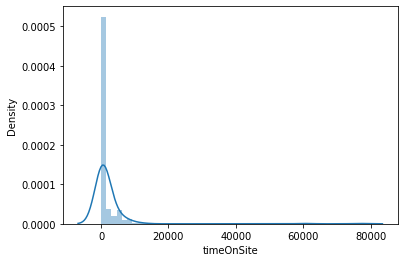

In [735]:
sns.distplot(temp_df_label_1.timeOnSite, hist=True, kde=True, bins=50)

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='timeOnSite', ylabel='Density'>

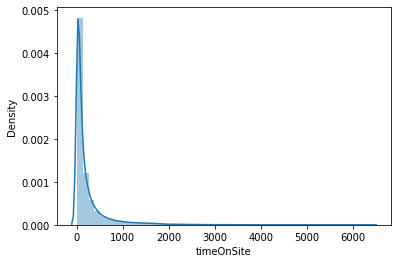

In [736]:
sns.distplot(temp_df_label_0.timeOnSite, hist=True, kde=True, bins=50)

In [737]:
temp_df_label_1.timeOnSite.describe(), temp_df_label_0.timeOnSite.describe()

(count      224.000000
 mean      1874.303571
 std       6727.263553
 min          0.000000
 25%        115.250000
 50%        460.500000
 75%       1164.250000
 max      76696.000000
 Name: timeOnSite, dtype: float64,
 count    135095.000000
 mean        219.120478
 std         379.854494
 min           0.000000
 25%          27.000000
 50%          80.000000
 75%         232.000000
 max        6391.000000
 Name: timeOnSite, dtype: float64)

In [738]:
#Removing outliers for label 0
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_0.timeOnSite)

Stats:
Mean value = 219.12047818202007
Standard deviation = 379.85308780093817
Threshold (Standard deviation *3) = 1139.5592634028144
Lower range = -920.4387852207943
Upper range = 1358.6797415848346
Max value = 6391


In [739]:
df.drop(index = temp_df_label_0[temp_df_label_0.timeOnSite > temp_upper].index, inplace=True)
df.reset_index(inplace=True, drop = True)
temp_df_label_0, temp_df_label_1 = get_label_seperated_dfs(df)

In [740]:
#Limiting outliers for label 1
temp_mean, temp_std, temp_threshold, temp_lower, temp_upper = get_stats(temp_df_label_1.timeOnSite)

Stats:
Mean value = 1874.3035714285713
Standard deviation = 6712.230543061042
Threshold (Standard deviation *3) = 20136.691629183126
Lower range = -18262.388057754553
Upper range = 22010.9952006117
Max value = 76696


In [741]:
df['timeOnSite'] = df.timeOnSite.apply(lambda x: x if x <=temp_upper else temp_upper)
print("Records transformed for label 0:", len(temp_df_label_0[temp_df_label_0.timeOnSite > temp_upper]))
print("Records transformed for label 1:", len(temp_df_label_1[temp_df_label_1.timeOnSite > temp_upper]))

df.head()

Records transformed for label 0: 0
Records transformed for label 1: 2


,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label,num_visits_transformed
0,5576035078968099840,95.0,1.0,0.0,3.0,3.0,461.0,Southern Europe,Chrome,Windows,0,0.000000
1,7201046511999320064,95.0,1.0,0.0,3.0,3.0,227.0,Eastern Asia,Opera,Windows,0,0.000000
2,538763607569025984,95.0,1.0,0.0,5.0,5.0,52.0,Western Europe,Safari,Macintosh,0,0.000000
3,6901049768533789696,95.0,2.0,0.0,7.0,7.0,144.0,Northern America,Safari,iOS,0,0.198866
4,8777024166359079936,95.0,1.0,0.0,7.0,5.0,86.0,Northern Europe,Safari,iOS,0,0.000000


In [742]:
len(df)

131669

It is also a good idea to see if converting the time values into hours and minutes makes any corelation with the labels.

In [743]:
df['timeOnSite_hours'] = df['timeOnSite'].apply(lambda x: x//3600)
df['timeOnSite_minutes'] = df['timeOnSite'].apply(lambda x: x//60)
df.head()

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,converted_label,num_visits_transformed,timeOnSite_hours,timeOnSite_minutes
0,5576035078968099840,95.0,1.0,0.0,3.0,3.0,461.0,Southern Europe,Chrome,Windows,0,0.000000,0.0,7.0
1,7201046511999320064,95.0,1.0,0.0,3.0,3.0,227.0,Eastern Asia,Opera,Windows,0,0.000000,0.0,3.0
2,538763607569025984,95.0,1.0,0.0,5.0,5.0,52.0,Western Europe,Safari,Macintosh,0,0.000000,0.0,0.0
3,6901049768533789696,95.0,2.0,0.0,7.0,7.0,144.0,Northern America,Safari,iOS,0,0.198866,0.0,2.0
4,8777024166359079936,95.0,1.0,0.0,7.0,5.0,86.0,Northern Europe,Safari,iOS,0,0.000000,0.0,1.0


### For `subcontinent` column

In [744]:
df.subcontinent.value_counts()

Northern America      68708
Western Europe         9697
Northern Europe        9192
Southern Asia          8605
Eastern Asia           6799
Eastern Europe         5319
Southeast Asia         5110
Southern Europe        4909
South America          4112
Western Asia           2870
Australasia            2518
Central America        1528
Northern Africa         753
Caribbean               370
Western Africa          355
Southern Africa         279
Eastern Africa          222
Central Asia             98
Middle Africa            42
Melanesia                15
Micronesian Region        6
Polynesia                 4
Name: subcontinent, dtype: int64

In [745]:
temp_df_label_1.subcontinent.value_counts()

Northern America    220
Western Europe        2
South America         1
Southeast Asia        1
Name: subcontinent, dtype: int64

As it can be noticed that out of all the continents majority of leads convertions are in North America. This tells us that the rest of the continents do not have much contribution. Hence we can group the subcontinents into eith higher level subcontinents or only continents.

In [746]:
temp_df_label_0.subcontinent.isnull().sum(), temp_df_label_1.subcontinent.isnull().sum()

(158, 0)

It could be seen that there are some missing values in the colum as well. We can remove them for better results.

In [747]:
df = df[df.subcontinent.notna()]

df.reset_index(inplace=True, drop=True)

temp_df_label_0, temp_df_label_1 =  get_label_seperated_dfs(df)

In [748]:
def to_continent(sub_continent):
    if sub_continent in ['Western Europe', 'Northern Europe']:
        return 'North & West Europe'
    elif sub_continent in ['Southern Asia', 'Eastern Asia', 'Southeast Asia', 'Western Asia', 'Central Asia']:
        return 'Asia' 
    elif sub_continent in ['Eastern Europe', 'Southern Europe']:
        return 'South & East Europe'
    elif sub_continent in ['Central America', 'Caribbean']:
        return 'Central America & Caribbean'
    elif 'Africa' in sub_continent.split():
        return 'Africa'
    elif sub_continent in ['Melanesia', 'Micronesian Region', 'Polynesia']:
        return 'Other_continent'
    else:
        return sub_continent


df['Continents'] = df.subcontinent.apply(to_continent)

In [749]:
df.Continents.value_counts()

Northern America               68708
Asia                           23482
North & West Europe            18889
South & East Europe            10228
South America                   4112
Australasia                     2518
Central America & Caribbean     1898
Africa                          1651
Other_continent                   25
Name: Continents, dtype: int64

In [750]:
temp_df_label_0, temp_df_label_1 =  get_label_seperated_dfs(df)

In [751]:
labels = df.Continents.unique().tolist()

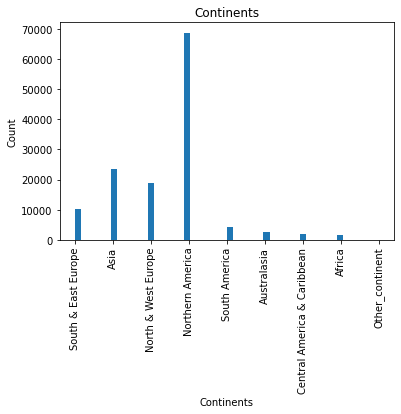

In [752]:
# Creating histogram
fig, ax = plt.subplots(1, 1)
plt.hist(df.Continents.tolist(),  align='mid', bins = 50)
plt.xticks(rotation='vertical')
  
# Set title
ax.set_title("Continents")
  
# adding labels
ax.set_xlabel('Continents')
ax.set_ylabel('Count')
  
# Show plot
plt.show()

One hot encoding for continents

In [753]:
all_continents = df.Continents.unique()

for continent in all_continents:
    df[f"is_{continent}"] = (df['Continents'] == continent).astype(int)
    print(f"{continent} is one hot encoded.")

South & East Europe is one hot encoded.
Asia is one hot encoded.
North & West Europe is one hot encoded.
Northern America is one hot encoded.
South America is one hot encoded.
Australasia is one hot encoded.
Central America & Caribbean is one hot encoded.
Africa is one hot encoded.
Other_continent is one hot encoded.


In [754]:
df.head(2)

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,...,Continents,is_South & East Europe,is_Asia,is_North & West Europe,is_Northern America,is_South America,is_Australasia,is_Central America & Caribbean,is_Africa,is_Other_continent
0,5576035078968099840,95.0,1.0,0.0,3.0,3.0,461.0,Southern Europe,Chrome,Windows,...,South & East Europe,1,0,0,0,0,0,0,0,0
1,7201046511999320064,95.0,1.0,0.0,3.0,3.0,227.0,Eastern Asia,Opera,Windows,...,Asia,0,1,0,0,0,0,0,0,0


In [755]:
temp_df_label_0, temp_df_label_1 =  get_label_seperated_dfs(df)

**For `device_browser` column**

In [756]:
df.device_browser.value_counts()[:15]

Chrome                      94505
Safari                      21491
Firefox                      4883
Internet Explorer            2736
Android Webview              2356
Edge                         1605
Safari (in-app)              1450
Opera Mini                    810
Opera                         644
UC Browser                    368
YaBrowser                     222
Amazon Silk                   108
Coc Coc                        76
Android Browser                76
Mozilla Compatible Agent       52
Name: device_browser, dtype: int64

In [757]:
df.device_browser.value_counts()[-15:]

Puffin                 34
Maxthon                24
MRCHROME               18
BlackBerry             16
Nintendo Browser       16
Nokia Browser           7
SeaMonkey               3
LYF_LS_4002_12          2
Seznam                  2
Iron                    2
osee2unifiedRelease     1
DoCoMo                  1
YE                      1
Reddit                  1
DASH_JR_3G              1
Name: device_browser, dtype: int64

In [758]:
temp_df_label_1.device_browser.value_counts()

Chrome               209
Safari                 7
Firefox                5
Internet Explorer      2
Safari (in-app)        1
Name: device_browser, dtype: int64

In [759]:
len(df.device_browser.unique())

30

In [760]:
# No Null values
df.device_browser.isnull().sum()

0

There are 30 different classes for browser and out of them only 5 have been used for label 1. Hence we can encode these into less number of classes.

In [761]:
Other_browsers =  df.device_browser.value_counts()[4:].index.values
Other_browsers

array(['Android Webview', 'Edge', 'Safari (in-app)', 'Opera Mini',
       'Opera', 'UC Browser', 'YaBrowser', 'Amazon Silk', 'Coc Coc',
       'Android Browser', 'Mozilla Compatible Agent', 'Puffin', 'Maxthon',
       'MRCHROME', 'BlackBerry', 'Nintendo Browser', 'Nokia Browser',
       'SeaMonkey', 'LYF_LS_4002_12', 'Seznam', 'Iron',
       'osee2unifiedRelease', 'DoCoMo', 'YE', 'Reddit', 'DASH_JR_3G'],
      dtype=object)

In [762]:
def browser_reduction(browser):
    if browser in Other_browsers:
        return 'Other_browser'
    return browser

df.device_browser = df.device_browser.apply(browser_reduction)
df.device_browser.value_counts()

Chrome               94505
Safari               21491
Other_browser         7896
Firefox               4883
Internet Explorer     2736
Name: device_browser, dtype: int64

In [763]:
all_browsers = df.device_browser.unique()

for browser in all_browsers:
    df[f"is_{browser}"] = (df['device_browser'] == browser).astype(int)
    print(f"{browser} is one hot encoded.")

Chrome is one hot encoded.
Other_browser is one hot encoded.
Safari is one hot encoded.
Firefox is one hot encoded.
Internet Explorer is one hot encoded.


In [764]:
temp_df_label_0, temp_df_label_1 =  get_label_seperated_dfs(df)

**For `device_operatingSystem` column**

In [765]:
df.device_operatingSystem.value_counts()

Windows          46405
Macintosh        32181
Android          22205
iOS              19871
Linux             5632
Chrome OS         4320
Windows Phone      159
Samsung             35
BlackBerry          19
Firefox OS          16
Xbox                13
Nintendo Wii        10
Nintendo WiiU        6
FreeBSD              1
OpenBSD              1
NTT DoCoMo           1
Name: device_operatingSystem, dtype: int64

In [766]:
temp_df_label_1.device_operatingSystem.value_counts()

Macintosh    127
Chrome OS     36
Windows       35
Linux         19
iOS            5
Android        2
Name: device_operatingSystem, dtype: int64

In [767]:
df.device_operatingSystem.isnull().sum()

636

In [768]:
#removing null values
df = df[df.device_operatingSystem.notna()]

df.reset_index(inplace=True, drop=True)

In [769]:
Other_os = df.device_operatingSystem.value_counts()[6:].index.values
Other_os

array(['Windows Phone', 'Samsung', 'BlackBerry', 'Firefox OS', 'Xbox',
       'Nintendo Wii', 'Nintendo WiiU', 'FreeBSD', 'OpenBSD',
       'NTT DoCoMo'], dtype=object)

In [770]:
def os_reduction(os):
    if os in Other_os:
        return 'Others_os'
    return os

df.device_operatingSystem = df.device_operatingSystem.apply(os_reduction)
df.device_operatingSystem.value_counts()

Windows      46405
Macintosh    32181
Android      22205
iOS          19871
Linux         5632
Chrome OS     4320
Others_os      261
Name: device_operatingSystem, dtype: int64

In [771]:
all_os = df.device_operatingSystem.unique()

for os in all_os:
    df[f"is_{os}"] = (df['device_operatingSystem'] == os).astype(int)
    print(f"{os} is one hot encoded.")

Windows is one hot encoded.
Macintosh is one hot encoded.
iOS is one hot encoded.
Android is one hot encoded.
Chrome OS is one hot encoded.
Linux is one hot encoded.
Others_os is one hot encoded.


In [772]:
temp_df_label_0, temp_df_label_1 =  get_label_seperated_dfs(df)

In [773]:
df.head()

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,...,is_Safari,is_Firefox,is_Internet Explorer,is_Windows,is_Macintosh,is_iOS,is_Android,is_Chrome OS,is_Linux,is_Others_os
0,5576035078968099840,95.0,1.0,0.0,3.0,3.0,461.0,Southern Europe,Chrome,Windows,...,0,0,0,1,0,0,0,0,0,0
1,7201046511999320064,95.0,1.0,0.0,3.0,3.0,227.0,Eastern Asia,Other_browser,Windows,...,0,0,0,1,0,0,0,0,0,0
2,538763607569025984,95.0,1.0,0.0,5.0,5.0,52.0,Western Europe,Safari,Macintosh,...,1,0,0,0,1,0,0,0,0,0
3,6901049768533789696,95.0,2.0,0.0,7.0,7.0,144.0,Northern America,Safari,iOS,...,1,0,0,0,0,1,0,0,0,0
4,8777024166359079936,95.0,1.0,0.0,7.0,5.0,86.0,Northern Europe,Safari,iOS,...,1,0,0,0,0,1,0,0,0,0


In [774]:
df.to_csv('dse_training_data_filtered.csv', index=False)

In [775]:
df.columns

Index(['fullVisitorId', 'days_inactive', 'num_visits',
       'sum_transactionRevenue', 'hits', 'pageviews', 'timeOnSite',
       'subcontinent', 'device_browser', 'device_operatingSystem',
       'converted_label', 'num_visits_transformed', 'timeOnSite_hours',
       'timeOnSite_minutes', 'Continents', 'is_South & East Europe', 'is_Asia',
       'is_North & West Europe', 'is_Northern America', 'is_South America',
       'is_Australasia', 'is_Central America & Caribbean', 'is_Africa',
       'is_Other_continent', 'is_Chrome', 'is_Other_browser', 'is_Safari',
       'is_Firefox', 'is_Internet Explorer', 'is_Windows', 'is_Macintosh',
       'is_iOS', 'is_Android', 'is_Chrome OS', 'is_Linux', 'is_Others_os'],
      dtype='object')